In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
sns.set_theme(style="darkgrid")

In [9]:
def ecdf(data):
    """
    Compute the empirical cumulative distribution function (ECDF) of a dataset.
    
    Parameters:
    data (array-like): The input dataset.
    
    Returns:
    x (array): The sorted values of the dataset.
    y (array): The cumulative probabilities associated with the sorted values.
    """
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y


In [11]:
def bootstrap_1d(data, func, size=1):
    """
    Perform bootstrap resampling on a one-dimensional dataset.

    Parameters:
    data (array-like): The one-dimensional dataset to be resampled.
    func (function): The function to apply on each resampled dataset.
    size (int): The number of resampled datasets to generate (default is 1).

    Returns:
    array-like: An array containing the results of applying the function on each resampled dataset.
    """

    empty_f = np.empty(size)
    for i in range(size):
        chunk = func(np.random.choice(data, len(data)))
        empty_f[i] = chunk
    return empty_f

In [12]:
def bootstrap_2d(data1, data2, func, size=1):
    """
    Perform 2D bootstrap resampling on two datasets and calculate the difference in function values.

    Parameters:
    data1 (array-like): The first dataset.
    data2 (array-like): The second dataset.
    func (function): The function to apply on the resampled datasets.
    size (int, optional): The number of bootstrap samples to generate. Defaults to 1.

    Returns:
    array-like: An array of size `size` containing the differences in function values for each bootstrap sample.
    """
    empty_f = np.empty(size)
    for i in range(size):
        b1 = np.random.choice(data1, len(data1))
        b2 = np.random.choice(data2, len(data2))
        empty_f[i] = func(b1) - func(b2)
    return empty_f


In [37]:
df=pd.read_csv('/Users/andrewkalachev/zebrafish.csv',header=4)
df.head()

,genotype,bout_length,fish
0,het,12.00,1
1,het,33.00,1
2,het,0.96,1
3,het,4.98,1
4,het,1.98,1


In [14]:
bout_lengths_wt=df[df['genotype']=='wt']['bout_length']
bout_lengths_mut=df[df['genotype']=='mut']['bout_length']
bout_lengths_het=df[df['genotype']=='het']['bout_length']

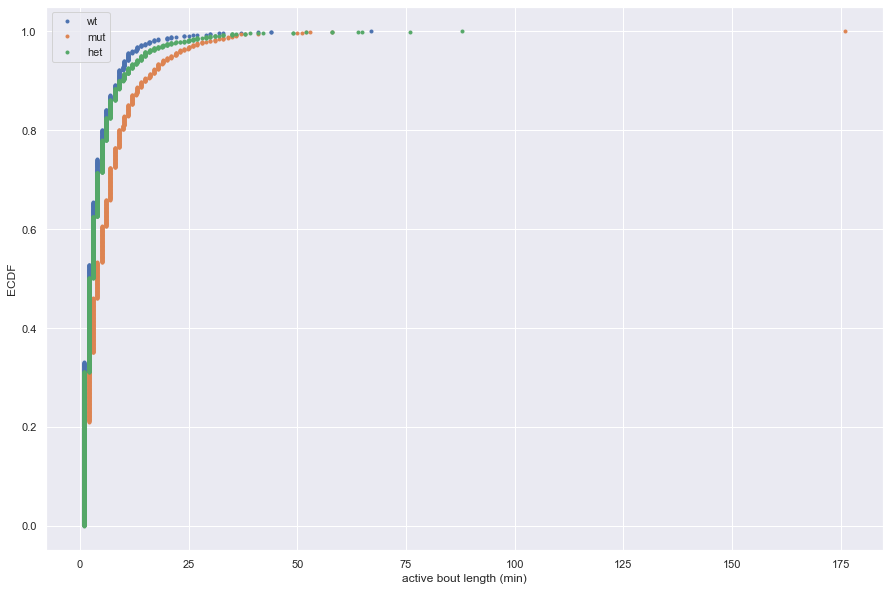

In [23]:
x_wt, y_wt = ecdf(bout_lengths_wt)
x_mut, y_mut = ecdf(bout_lengths_mut)
x_het, y_het = ecdf(bout_lengths_het)

# Plot the ECDFs
_ = plt.figure(figsize=(15,10))
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none')
_ = plt.plot(x_mut, y_mut, marker='.', linestyle='none')
_ = plt.plot(x_het, y_het, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut', 'het'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')

plt.show()

In [13]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = bootstrap_1d(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = bootstrap_1d(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



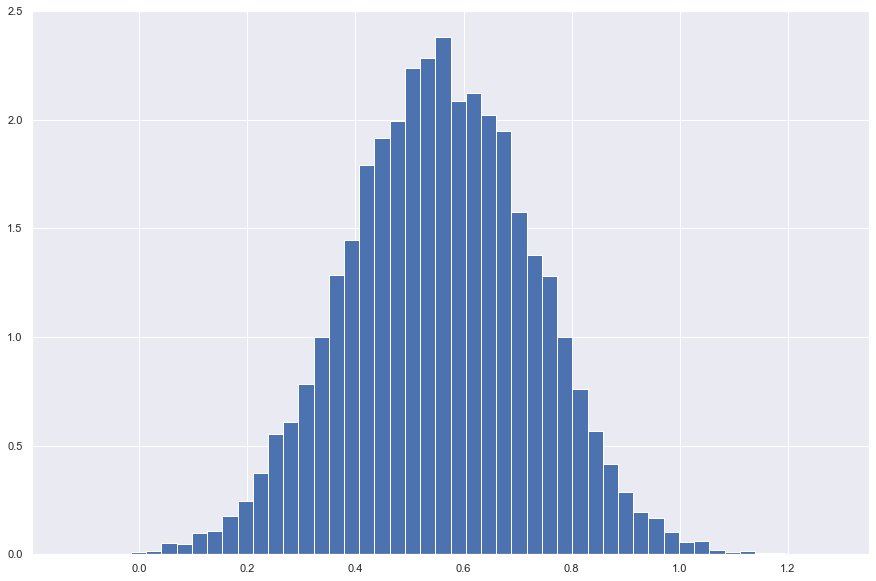

In [35]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = bootstrap_2d(bout_lengths_het,bout_lengths_wt, np.mean, size=10000)

_ = plt.figure(figsize=(15,10))
_ = plt.hist(perm_reps, bins=50, density=True)